In [1]:
# Load stored variables
%store -r final_sales_df

## Are there stores underperforming?

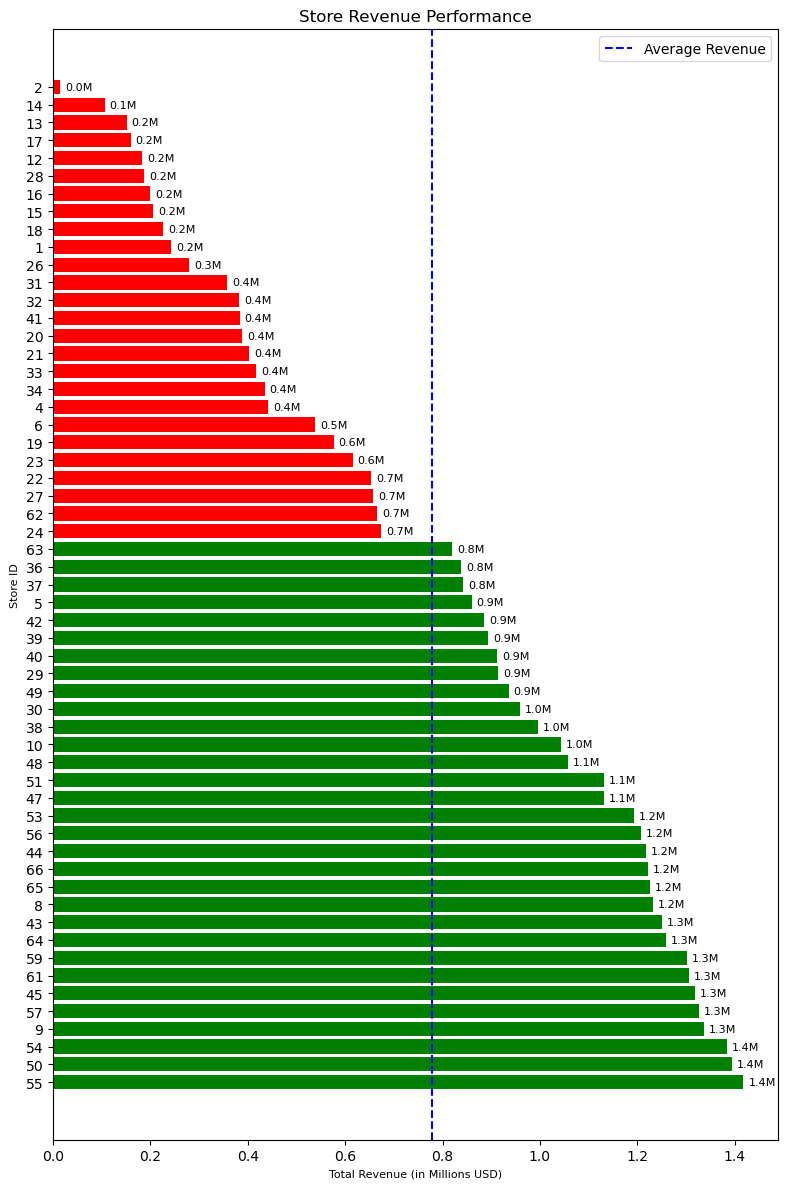

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Revenue: Quantity * Unit Price USD
final_sales_df['Revenue'] = final_sales_df['Quantity'] * final_sales_df['Unit Price USD'].astype(float)

# Group by StoreKey and calculate total revenue
store_revenue = final_sales_df.groupby('StoreKey')['Revenue'].sum().reset_index()

# Remove Store ID 0 as it represent On-line store
store_revenue = store_revenue[store_revenue['StoreKey'] != 0]

# Calculate average revenue excluding Store ID 0
average_revenue = store_revenue['Revenue'].mean()

# Flag underperforming stores (below average)
store_revenue['Performance'] = store_revenue['Revenue'].apply(lambda x: 'Underperforming' if x < average_revenue else 'Performing')

# Sort data by revenue (descending order)
store_revenue = store_revenue.sort_values(by='Revenue', ascending=False)

# Plot Horizontal Bar Chart for Store Performance
plt.figure(figsize=(8, 12))

# Plot sorted store data with colors for performance
colors = store_revenue['Performance'].map({'Underperforming': 'red', 'Performing': 'green'})
plt.barh(store_revenue['StoreKey'].astype(str), store_revenue['Revenue'] / 1e6, color=colors)  # Convert to thousands for display

# Add a vertical line for average revenue
plt.axvline(average_revenue / 1e6, color='blue', linestyle='--', label=f'Avg Revenue: {average_revenue / 1e6:,.1f}M')

# Add titles and labels
plt.title('Store Revenue Performance', fontsize=12)
plt.xlabel('Total Revenue (in Millions USD)', fontsize=8)
plt.ylabel('Store ID', fontsize=8)

# Adding values to the bars in thousands format
for idx, (store_id, revenue) in enumerate(zip(store_revenue['StoreKey'], store_revenue['Revenue'])):
    plt.text(revenue / 1e6 + 0.01, idx, f'{revenue / 1e6:,.1f}M', va='center', fontsize=8)


# Add a legend
plt.legend(['Average Revenue'], loc='upper right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [129]:
# Print underperforming stores
underperforming_stores = store_revenue[store_revenue['Performance'] == 'Underperforming'].sort_values(by='Revenue', ascending=True)
print("Underperforming Stores:")
print(underperforming_stores)

Underperforming Stores:
    StoreKey    Revenue      Performance
2          2   15175.99  Underperforming
11        14  105714.05  Underperforming
10        13  150925.12  Underperforming
14        17  159607.50  Underperforming
9         12  183091.04  Underperforming
24        28  187109.49  Underperforming
13        16  199009.69  Underperforming
12        15  205119.67  Underperforming
15        18  226078.88  Underperforming
1          1  243029.93  Underperforming
22        26  279774.56  Underperforming
27        31  357130.15  Underperforming
28        32  382595.10  Underperforming
36        41  383054.03  Underperforming
17        20  388594.07  Underperforming
18        21  402274.12  Underperforming
29        33  416858.99  Underperforming
30        34  434760.24  Underperforming
3          4  442475.02  Underperforming
5          6  538781.94  Underperforming
16        19  576574.93  Underperforming
20        23  615040.59  Underperforming
19        22  652984.86  Underper

In [ ]:
# Select relevant columns for merging
store_location_info = final_sales_df[['StoreKey', 'Store State', 'Store Country']].drop_duplicates()

# Merge the underperforming stores with location information
underperforming_stores = underperforming_stores.merge(
    store_location_info,
    on='StoreKey',
    how='left'
)
# Drop the 'Performance' column
underperforming_stores = underperforming_stores.drop(columns=['Performance'])

In [43]:
# Display the updated underperforming stores DataFrame
print("Underperforming Stores with Location Info:")
print(underperforming_stores)

Underperforming Stores with Location Info:
    StoreKey    Revenue                   Store State   Store Country
0          2   15175.99            Northern Territory       Australia
1         14  105714.05                 Franche-Comté          France
2         13  150925.12                         Corse          France
3         17  159607.50                    Martinique          France
4         12  183091.04               Basse-Normandie          France
5         28  187109.49                 Caltanissetta           Italy
6         16  199009.69                      Limousin          France
7         15  205119.67                    La Réunion          France
8         18  226078.88                       Mayotte          France
9          1  243029.93  Australian Capital Territory       Australia
10        26  279774.56                      Saarland         Germany
11        31  357130.15                       Drenthe     Netherlands
12        32  382595.10                     Fle

#### There are 26 stores underperforming

In [ ]:
# Extract Year and Quarter from Order Date
final_sales_df['Year'] = final_sales_df['Order Date'].dt.year
final_sales_df['Quarter'] = final_sales_df['Order Date'].dt.to_period('Q')

# Group by Year, Quarter, and StoreKey to calculate averages for profit
average_performance = final_sales_df.groupby(['Year', 'Quarter', 'StoreKey']).agg(
    Avg_Revenue=('Revenue', 'mean')
).reset_index()

# Remove Store ID 0 as it represent On-line store
average_performance = average_performance[average_performance['StoreKey'] != 0]

In [239]:
# Display the first few rows of the result
average_performance.head()

,Year,Quarter,StoreKey,Avg_Revenue
1,2016,2016Q1,2,1068.038333
2,2016,2016Q1,4,960.846250
3,2016,2016Q1,5,2023.699286
4,2016,2016Q1,6,886.038148
5,2016,2016Q1,8,937.256912


#### Focus in the bottom 3

In [219]:
# Convert 'Quarter' from period type to string format (e.g., '2021-Q1', '2021-Q2', etc.)
average_performance['Quarter'] = average_performance['Quarter'].astype(str)

# Calculate the total average profit by quarter for all stores
total_avg_performance = average_performance.groupby(['Year', 'Quarter']).agg(
    Total_Avg_Revenue=('Avg_Revenue', 'mean')
).reset_index()

# Calculate the bottom 3 stores based on average revenue (you can sort by Avg_Revenue in ascending order)
bottom_stores = average_performance.groupby('StoreKey').agg(
    Avg_Revenue=('Avg_Revenue', 'mean')
).sort_values(by='Avg_Revenue').head(3).reset_index()

# Filter the average performance for the bottom stores
bottom_store_performance = average_performance[average_performance['StoreKey'].isin(bottom_stores['StoreKey'])]

In [229]:
print(bottom_stores)

   StoreKey  Avg_Revenue
0         2   730.646667
1         1   743.149194
2        15   772.204939


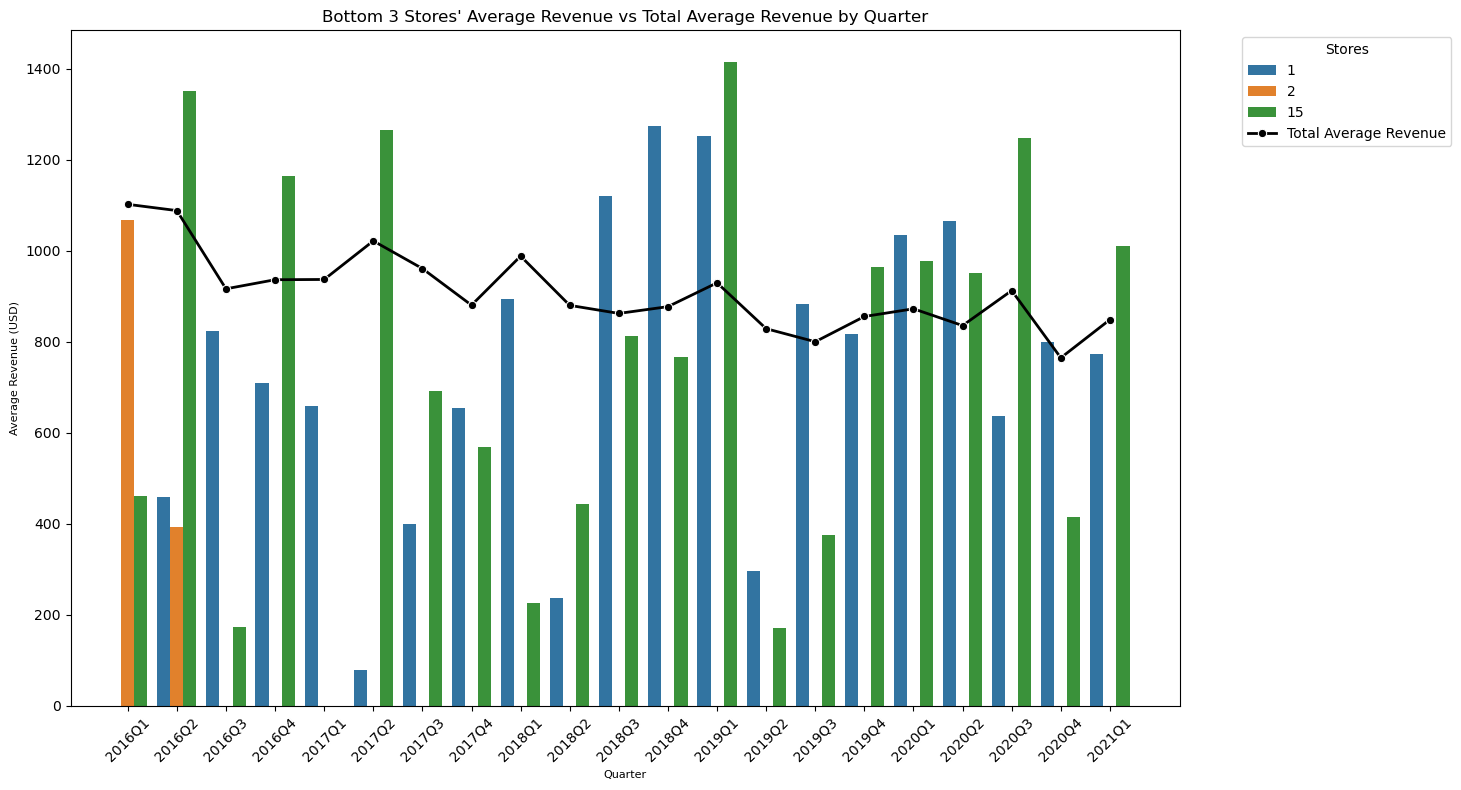

In [221]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for the bottom stores' average profit by quarter
sns.barplot(data=bottom_store_performance, x='Quarter', y='Avg_Revenue', hue='StoreKey', palette='tab10')

# Line plot for total average profit by quarter
sns.lineplot(data=total_avg_performance, x='Quarter', y='Total_Avg_Revenue', marker='o', color='black', label='Total Average Revenue', linewidth=2)

# Adding titles and labels
plt.title("Bottom 3 Stores' Average Revenue vs Total Average Revenue by Quarter", fontsize=12)
plt.xlabel("Quarter", fontsize=8)
plt.ylabel("Average Revenue (USD)", fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()

# Show legend
plt.legend(title="Stores", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

#### Store 2 seems to be inactive; a status column would have helped remove it. Store 1 and Store 15 were above average in some quarters.

In [ ]:
# Merge the total average with the bottom stores performance
bottom_store_performance = average_performance[average_performance['StoreKey'].isin(underperforming_stores['StoreKey'])]

# Merge to compare each store's average profit to the total average profit by quarter
merged_data = pd.merge(bottom_store_performance, total_avg_performance, on=['Year', 'Quarter'], how='left')

# Create a column that marks whether the store's profit is above or below the total average
merged_data['Above_Above_Avg'] = merged_data['Avg_Revenue'] > merged_data['Total_Avg_Revenue']


In [153]:
# Get the count of each unique value in 'Above_Above_Avg' for each 'StoreKey'
counts = merged_data.groupby('StoreKey')['Above_Above_Avg'].value_counts().unstack(fill_value=0)
# Rename columns for clarity (optional)
counts.columns = ['Quarters Below Avg', 'Quarters Above Avg']

In [231]:
print(merged_data)

     Year Quarter  StoreKey  Avg_Revenue  Total_Avg_Revenue  Above_Above_Avg
0    2016  2016Q1         2  1068.038333        1101.668047            False
1    2016  2016Q1         4   960.846250        1101.668047            False
2    2016  2016Q1         6   886.038148        1101.668047            False
3    2016  2016Q1        12   575.983571        1101.668047            False
4    2016  2016Q1        13   491.980000        1101.668047            False
..    ...     ...       ...          ...                ...              ...
444  2021  2021Q1        31   351.053000         848.373954            False
445  2021  2021Q1        32  1041.594000         848.373954             True
446  2021  2021Q1        33   237.465000         848.373954            False
447  2021  2021Q1        34  1299.544000         848.373954             True
448  2021  2021Q1        62  1121.775806         848.373954             True

[449 rows x 6 columns]


In [155]:
print(counts)

          Quarters Below Avg  Quarters Above Avg
StoreKey                                        
1                         13                   7
2                          2                   0
4                          9                  11
6                         12                   9
12                        13                   6
13                        16                   4
14                        11                   6
15                        11                   9
16                        11                   8
17                        13                   7
18                         7                  12
19                        12                   9
20                        10                   5
21                         4                   8
22                        13                   8
23                        14                   7
24                        14                   7
26                         3                   6
27                  

In [ ]:
# Get the percentage of quarters below average
counts['Percentage Below'] = counts['Quarters Below Avg']/(counts['Quarters Below Avg']+counts['Quarters Above Avg'])

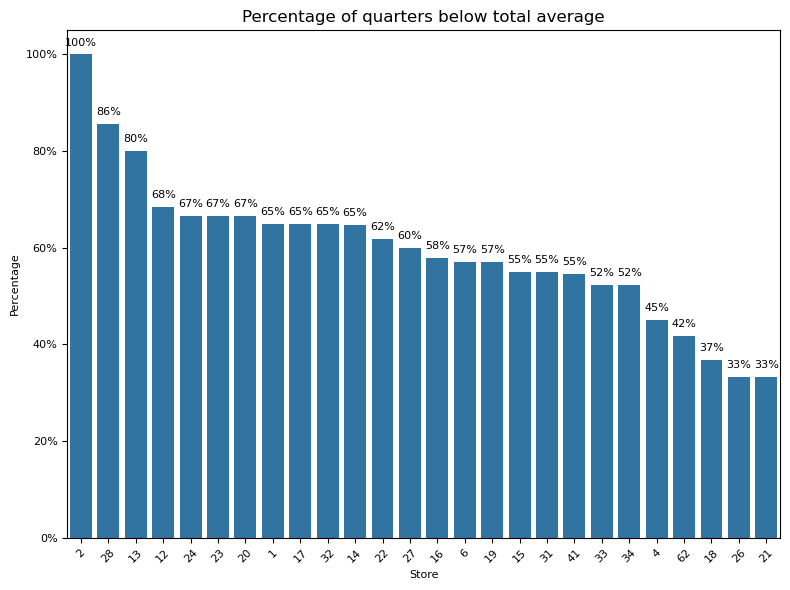

In [217]:
# Sort counts by 'Percentage Below' in descending order
counts_sorted = counts.sort_values(by='Percentage Below', ascending=False).reset_index()
sorted_storekeys = counts_sorted['StoreKey']

# Plotting
plt.figure(figsize=(8, 6))

# Bar plot for the percentage above average
ax = sns.barplot(data=counts_sorted , x='StoreKey', y='Percentage Below', order=sorted_storekeys)

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1))

# Adding titles and labels
plt.title("Percentage of quarters below total average", fontsize=12)
plt.xlabel("Store", fontsize=8)
plt.ylabel("Percentage", fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # Offset for the label
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

In [225]:
print(counts_sorted[['StoreKey','Percentage Below']])

    StoreKey  Percentage Below
0          2          1.000000
1         28          0.857143
2         13          0.800000
3         12          0.684211
4         24          0.666667
5         23          0.666667
6         20          0.666667
7          1          0.650000
8         17          0.650000
9         32          0.650000
10        14          0.647059
11        22          0.619048
12        27          0.600000
13        16          0.578947
14         6          0.571429
15        19          0.571429
16        15          0.550000
17        31          0.550000
18        41          0.545455
19        33          0.523810
20        34          0.523810
21         4          0.450000
22        62          0.416667
23        18          0.368421
24        26          0.333333
25        21          0.333333


#### If we analyze the average revenue per quarter, the stores with the worst performance are 2, 1, and 15. However, if we consider the number of quarters each store performed below the total average revenue, the worst-performing stores are 2, 28, and 13. 